In [15]:
#import tensorflow as ts
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(xtrain, ytrain),(xtest,ytest) = cifar10.load_data()

type(xtrain)

numpy.ndarray

In [16]:
xtrain.shape

(50000, 32, 32, 3)

In [17]:
xtrain[2]


array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]

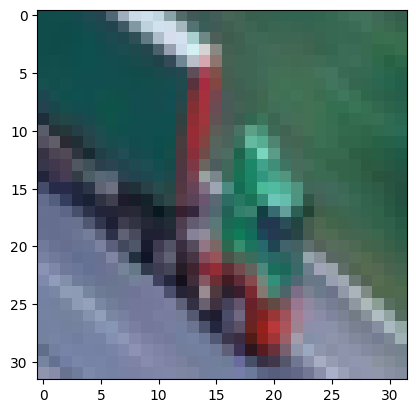

In [18]:
img0=plt.imshow(xtrain[50])

In [19]:
(xtrain, ytrain),(xtest,ytest) = cifar10.load_data()

In [20]:
lab1=ytrain[10]
print(lab1)
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

[4]


In [21]:
print("Image class is", classification[ytrain[30][0]])

Image class is airplane


In [22]:
ytrain_one_hot = to_categorical(ytrain)
ytest_one_hot = to_categorical(ytest)

xtrain = xtrain/255
ytest = xtest/255

In [23]:
xtrain[30]

array([[[0.49411765, 0.4627451 , 0.43137255],
        [0.47843137, 0.45098039, 0.42352941],
        [0.49411765, 0.46666667, 0.43529412],
        ...,
        [0.48627451, 0.4627451 , 0.41568627],
        [0.47058824, 0.44705882, 0.4       ],
        [0.45882353, 0.43529412, 0.38823529]],

       [[0.47843137, 0.45098039, 0.41960784],
        [0.46666667, 0.43921569, 0.40784314],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.48627451, 0.4627451 , 0.41568627],
        [0.47843137, 0.45490196, 0.40784314],
        [0.45882353, 0.43529412, 0.38823529]],

       [[0.47843137, 0.45098039, 0.41960784],
        [0.4745098 , 0.44705882, 0.41568627],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.49411765, 0.47058824, 0.42352941],
        [0.48235294, 0.45882353, 0.41176471],
        [0.4745098 , 0.45098039, 0.40392157]],

       ...,

       [[0.49411765, 0.4627451 , 0.41960784],
        [0.49411765, 0.4627451 , 0.41960784],
        [0.50196078, 0

In [24]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [47]:
tr=model.fit(xtrain, ytrain_one_hot, batch_size=256, epochs=25, validation_split=0.2)

Epoch 1/25
157/157 [==============================] - 19s 121ms/step - loss: 0.3090 - accuracy: 0.8909 - val_loss: 1.1193 - val_accuracy: 0.6985
Epoch 2/25
157/157 [==============================] - 17s 107ms/step - loss: 0.3005 - accuracy: 0.8946 - val_loss: 1.0986 - val_accuracy: 0.6964
Epoch 3/25
157/157 [==============================] - 17s 108ms/step - loss: 0.2871 - accuracy: 0.8988 - val_loss: 1.1621 - val_accuracy: 0.6902
Epoch 4/25
157/157 [==============================] - 18s 115ms/step - loss: 0.2870 - accuracy: 0.8991 - val_loss: 1.1315 - val_accuracy: 0.6985
Epoch 5/25
157/157 [==============================] - 17s 109ms/step - loss: 0.2708 - accuracy: 0.9054 - val_loss: 1.1094 - val_accuracy: 0.7002
Epoch 6/25
157/157 [==============================] - 17s 109ms/step - loss: 0.2668 - accuracy: 0.9047 - val_loss: 1.1471 - val_accuracy: 0.7007
Epoch 7/25
157/157 [==============================] - 17s 108ms/step - loss: 0.2412 - accuracy: 0.9157 - val_loss: 1.1645 - val_ac

In [72]:
c= plt.imread('C://Users//joero//OneDrive//Desktop//dog.jpg')

In [73]:
from skimage import transform
resize =transform.resize(c,(32,32,3))

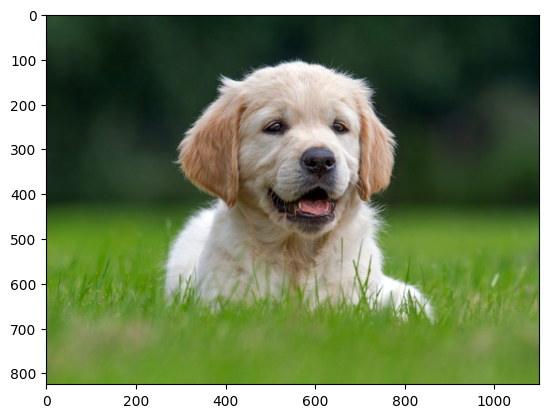

In [74]:
img=plt.imshow(resize)
plt.imshow(c)

In [75]:
prediction = model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 47ms/step
[[4.6402118e-14 1.0030417e-14 3.0584191e-09 2.8762755e-14 6.9941264e-18
  1.0000000e+00 9.3424053e-19 4.6743281e-08 6.0442450e-15 2.7651454e-16]]


In [76]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
  for j in range(10): 
     if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)


[5, 7, 2, 0, 3, 1, 8, 9, 4, 6]


In [77]:
for i in range(1):
        print(classification[list_index[i]])

dog
